# **Logistic Regresion**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

In [2]:
df = pd.read_csv("../data/iris.csv", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


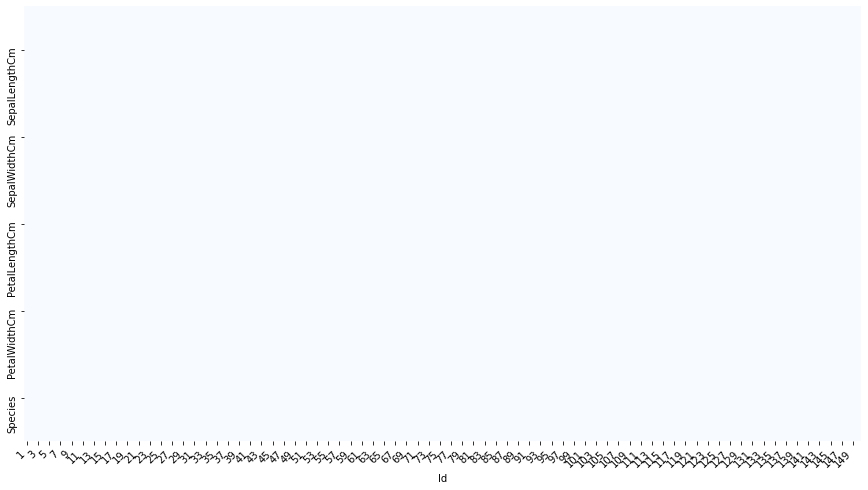

In [3]:
plot_missing_value(df)

**Data Balance**

In [4]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/home/rizki/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/rizki/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

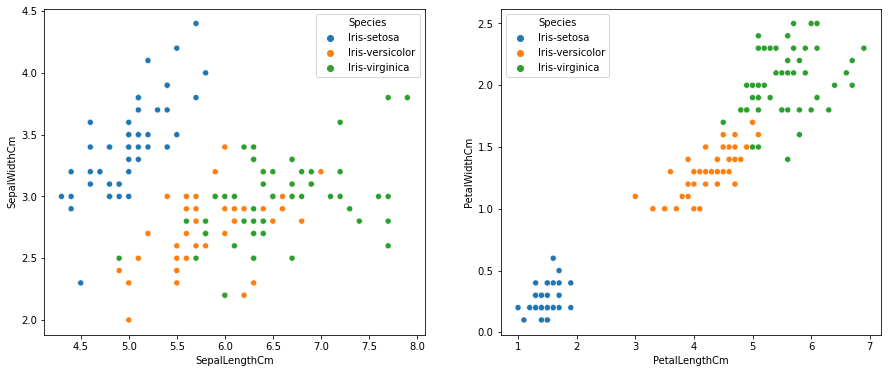

In [5]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot("SepalLengthCm","SepalWidthCm","Species",data=df)

plt.subplot(1,2,2)
sns.scatterplot("PetalLengthCm","PetalWidthCm","Species",data=df)

## **Split Data**

In [6]:
X = df.drop(columns=["Species"])
y = df["Species"]

#stratify suffle split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## **Training**

In [7]:
from sklearn.linear_model import LogisticRegression
from jcopml.tuning import grid_search_params as gsp
from sklearn.model_selection import GridSearchCV

In [8]:
gsp.logreg_params

{'algo__fit_intercept': [True, False],
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

fit_intercept ingin mempertimbangkan ax + b <br>
C = regulalizaion

## **ONE VS ALL / ONE VS REST**

In [13]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", LogisticRegression(multi_class='ovr',solver='lbfgs', n_jobs=-1, random_state=42))
])

#Tuning
model = GridSearchCV(pipeline, gsp.logreg_params , cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 1000.0, 'algo__fit_intercept': False}
0.9583333333333334 0.9666666666666667 0.9500000000000001


## **Multinominal**

In [10]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1, random_state=42))
])

#Tuning
model = GridSearchCV(pipeline, gsp.logreg_params , cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'algo__C': 10.0, 'algo__fit_intercept': True}
0.975 1.0 0.9666666666666667


In [15]:
Series = pd.Series(model.predict(X_train),name="Predict")
Series.to_frame()

,Predict
0,Iris-setosa
1,Iris-virginica
2,Iris-versicolor
3,Iris-setosa
4,Iris-versicolor
...,...
115,Iris-setosa
116,Iris-setosa
117,Iris-setosa
118,Iris-versicolor


# **Rangkuman Matriks**

1) Data balance pakai acurasi (Pakai PR atau ROC sama aja)
2) Data Imabalance (Positve sample > 95%) pakai F1 Score atau redfine label negatif agar lebih banyak
3) Data Imbalance (Positve sample < 5%) pakai PR_AUC

# **Evaluation Clasification**

1) Plot clasification report
2) Confusion Matriks kalau di regresi actual vs predict
3) ROC
4) PR

# **Tambahan Dikit**
 - Transform pada pipe (you Jhonson untuk data skew negatif dan positif) (skew Box Cox Data yang Positif)